# SVM classification

SVM is a margin classification algorithm. Also referenced as large margin classifiers.

Developed since 1960's.

## SVM objective

From wikipedia

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/440px-Svm_separating_hyperplanes_%28SVG%29.svg.png" align="left"/>


- H1 does not separate the classes.
- H2 does, but only with a small margin.
- H3 separates them with the maximum margin.

Considering logistic regression classifier, we have the logit function below:

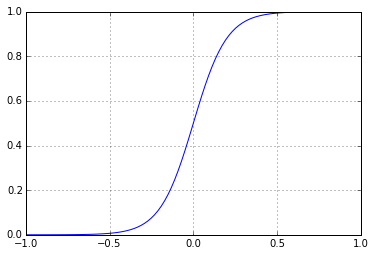

In [140]:
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_classification, make_regression
from sklearn.metrics import classification_report, accuracy_score
from sklearn import linear_model
import scipy.optimize as opt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)

plt.grid()
plt.plot(x / x.max(), sigmoid(x))
plt.show()

Considering logistic regression, for y = 1 (positive examples) we have the following cost function:

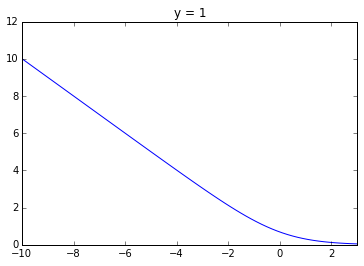

In [141]:
# for y = 1
l = np.linspace(-10, 10, 100)
plt.plot(l, -np.log(1/(1 + np.exp(-l))))
plt.xlim([-10, 3])
plt.title('y = 1')
plt.show()

SVM makes an approximation of logistic curve

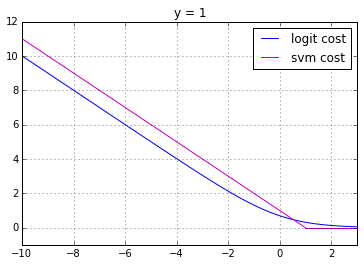

In [100]:
# for y = 1
l = np.linspace(-10, 10, 100)
plt.plot(l, -np.log(1/(1 + np.exp(-l))))
plt.xlim([-10, 3])
plt.ylim([-1, 12])

plt.grid()

# x < 1
x0 = np.linspace(-10, 1, 100)
plt.plot(x0, 1 + (-1 * x0), 'm-')

# x >= 1
x1 = np.linspace(1, 10, 100)
plt.plot(x1, np.zeros(shape=(len(x1),)), 'm-')

plt.title('y = 1')
plt.legend(['logit cost', 'svm cost'])
plt.show()

This function is also defined as $cost_{1}(\Theta^{T} x^{(i)})$

The same idea is applied to y = 0

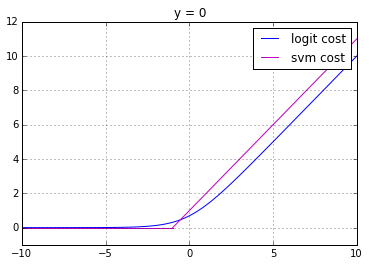

In [124]:
# for y = 0
l = np.linspace(-10, 10, 100)
plt.plot(l, -np.log(1-(1/(1 + np.exp(-l)))))
plt.ylim([-1, 12])

plt.grid()

# x < 1
x0 = np.linspace(-10, -1, 100)
plt.plot(x0, np.zeros(shape=(len(x0),)),  'm-')

# x >= 1
x1 = np.linspace(-1, 10, 100)
plt.plot(x1, 1 + (1 * x1), 'm-')
plt.title('y = 0')
plt.legend(['logit cost', 'svm cost'])
plt.show()

Then, this one is $cost_{0}(\Theta^{T} x^{(i)})$

## Definition


Logistic regression optimization is given by:

$\Large{min_{\theta} \frac{1}{m} \left[ \sum_{i=1}^{m} y^{(i)} (-\log(h_{\theta}(x^{(i)})) + (1- y^{(i)})((-\log(1- h_{\theta}(x^{(i)}))) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_{j}^{2}}$

Alternative view of logistic regression, abstracting cost function for each class $[1, 0]$, we end with:

$\Large{min_{\theta} \frac{1}{m} \left[ \sum_{i=1}^{m} y^{(i)} cost_{1}(\Theta^{T}x^{(i)}) + (1- y^{(i)})cost_{0}(\Theta^{T}x^{(i)}) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_{j}^{2}}$

It can be simplified by the following equation, getting rid of the term $m$:

$\Large{A + \lambda B}$

And by SVM convention, the notation below is used:

$\Large{C = \frac{1}{\lambda}}$

$\Large{C A + B}$

This is a linear classifier. However, very often it is necessary to fit more complex models that are non linearly separable.

# Kernels

Instead of defining a polynomial feature, SVM uses a different approach called kernels.



In a glance, kernels project data into a different space where they are linearly separable.

<img src="svm.png" />

The most common kernels are:

- Linear
- Gaussian (RBF)
- Polynomial 

### Example

/Users/danilonunes/.virtualenvs/dns/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/danilonunes/.virtualenvs/dns/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/danilonunes/.virtualenvs/dns/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/danilonunes/.virtualenvs/dns/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


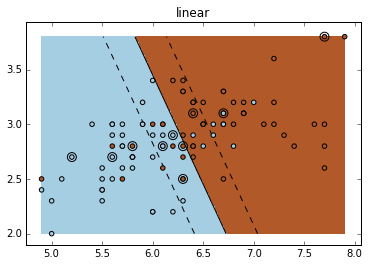

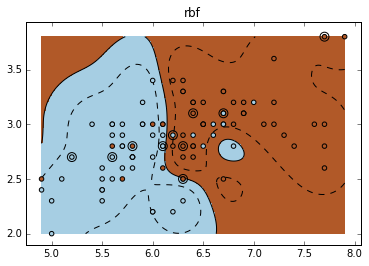

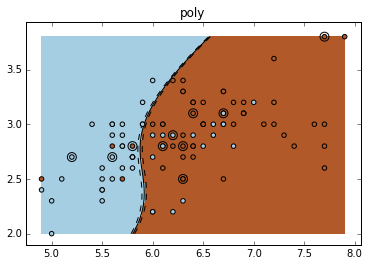

In [142]:
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:.9 * n_sample]
y_train = y[:.9 * n_sample]
X_test = X[.9 * n_sample:]
y_test = y[.9 * n_sample:]

# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

## SVM application

There are one parameter that must be set C.

- C is large it tends to overfit
- C is small it tends to underfit

If a Gaussian kernel is used it is necessary to also set $\Large{\sigma^{2}}$ value.

Note: In sklearn it is called gamma

- $\sigma^{2}$ is large tends to underfit
- $\sigma^{2}$ is small tends to overfit


Polynomial kernel can also ask for degree of polynomial 

#### Custom kernels

It is also possible use custom kernels.
Sklearn also provides an [example](http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#example-svm-plot-custom-kernel-py).

### Additional resources

[Sklearn SVM page](http://scikit-learn.org/stable/modules/svm.html)

[Andrew Zisserman](http://www.robots.ox.ac.uk/~az/lectures/ml/index.html)

[Libsvm](http://www.csie.ntu.edu.tw/~cjlin/libsvm/)